In [ ]:
# matplot 한글 폰트 출력: 실행 후 세션 다시 시작해야 합니다.

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd



df = pd.read_csv("/content/진짜찐최종충전량_석유.csv")  # 예시

df['totalcar'] = df[['전기', '하이브리드(CNG+전기)', '하이브리드(LPG+전기)', '하이브리드(경유+전기)', '하이브리드(휘발유+전기)']].sum(axis=1)

# 필요한 열만 선택
variables_to_remove = ["충전소ID", "시도",'시군구','본부','사업소','충전기ID','주소',
                       '입력주소','X','Y','CLSS','PNU','주소구분','표준신주소','표준구주소','우편번호','행정동코드',
                       '행정동명','법정동코드','법정동명','표준지여부',
                       '데이터기준일자','상권 분류','상권 코드','충전기명',
                       '공시일자','상권 분류 코드','상권명']  # 제거할 변수들

df = df.drop(columns=variables_to_remove)

# 2. "충전량" 열을 데이터프레임의 마지막 열로 이동
column_order = [col for col in df.columns if col != "충전량"] + ["충전량"]
filtered_df = df[column_order]



## EDA

In [98]:
print(filtered_df.columns)

Index(['용도', '충전구분', '농업, 임업, 어업 사업장 수', '광업 사업장 수', '제조업 사업장 수',
       '전기, 가스, 증기 및 공기조절 공급업 사업장 수', '수도, 하수 및 폐기물 처리, 원료 재생업 사업장 수',
       '건설업 사업장 수', '도매 및 소매업 사업장 수', '운수 및 창고업 사업장 수',
       ...
       'wash_1km', 'repair_500m', 'repair_1km', 'isunder', '소계', '휘발유', '등유',
       '경유', 'LPG', '충전량'],
      dtype='object', length=190)


## 전처리

In [4]:
Q1 = filtered_df['충전량'].quantile(0.25)
Q3 = filtered_df['충전량'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
filtered_df = filtered_df[(filtered_df['충전량'] >= lower_bound) & (df['충전량'] <= upper_bound)]

filtered_df= filtered_df.fillna(0)

filtered_df = filtered_df[filtered_df["충전량"] > 50]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

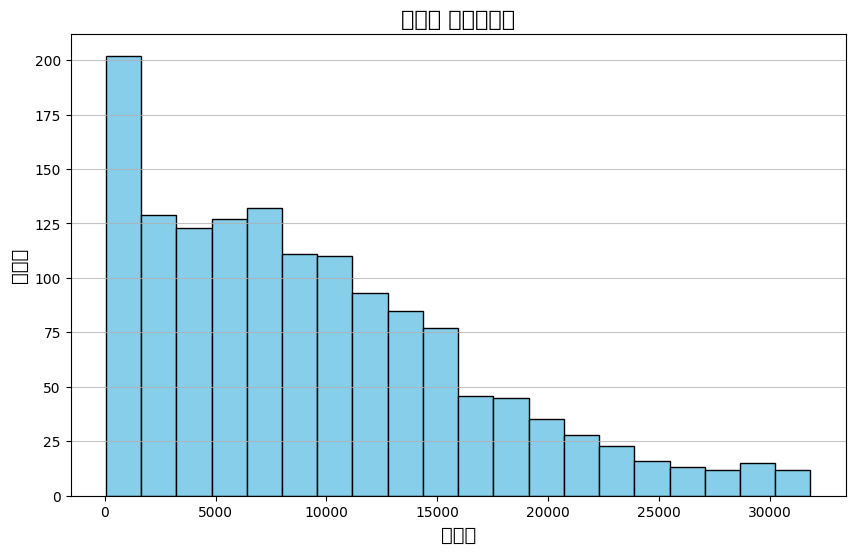

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 예시 (실제 데이터프레임에 맞게 수정)

# '충전량' 열의 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['충전량'], bins=20, color='skyblue', edgecolor='black')
plt.title('충전량 히스토그램', fontsize=16)
plt.xlabel('충전량', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [5]:
temp=pd.DataFrame()

temp['충전구분']=filtered_df['충전구분']

columns_to_drop = ['용도','충전구분']

filtered_df=filtered_df.drop(columns=columns_to_drop)


In [89]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# 예제 데이터 프레임 생성
# df = pd.DataFrame({
#     'feature1': [...],
#     'feature2': [...],
#     'feature3': [...],
# })

# 데이터 프레임에 상수(constant) 추가
X = add_constant(filtered_df)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

# VIF 출력
print(vif_data_sorted)



                   feature        VIF
0                    const  98.165143
17          25세이상~29세이하_남자  16.133808
8   전문, 과학 및 기술 서비스업 사업장 수  16.111697
63              coffee_1km  13.741832
6              정보통신업 사업장 수  12.644711
..                     ...        ...
46                   2019년   1.558102
37                   2010년   1.516942
93                 isunder   1.367109
98                     충전량   1.228442
74           하이브리드(CNG+전기)   1.182950

[99 rows x 2 columns]


In [70]:
filtered_df = filtered_df.drop(columns='휘발유')

In [6]:
variables_to_remove = ["농업, 임업, 어업 사업장 수",'광업 사업장 수','제조업 사업장 수','전기', '총주택(거처)수',
                       '총가구수','50세이상~54세이하','아파트','25세이상~29세이하',"총인구","총인구(남자)","총인구(여자)",
                        '45세이상~49세이하','30세이상~34세이하','40세이상~44세이하','55세이상~59세이하','35세이상~39세이하',
                        '60세이상~64세이하','20세이상~24세이하','10세이상~14세이하','65세이상~69세이하','15세이상~19세이하',
                        '1990년~1999년','5세이상~9세이하','70세이상~74세이하','75세이상~79세이하','4세이하','80세이상~84세이하',
                         '85세이상~89세이하','2세대가구','TOP_HMDT','90세이상~94세이하','45세이상~49세이하_여자',
                         '60세이상~64세이하_여자','40세이상~44세이하_여자','50세이상~54세이하_남자','30세이상~34세이하_여자',
                         "1세대가구",'55세이상~59세이하_여자','65세이상~69세이하_남자','40세이상~44세이하_남자',
                          '50세이상~54세이하_여자','65세이상~69세이하_여자','5세이상~9세이하_남자','35세이상~39세이하_여자',
                         '70세이상~74세이하_여자','10세이상~14세이하_여자','80세이상~84세이하_여자','75세이상~79세이하_남자',
                          '1인가구','총 사업체 수','75세이상~79세이하_여자','4세이하_여자','30세이상~34세이하_남자',
                       '60세이상~64세이하_남자','10세이상~14세이하_남자','35세이상~39세이하_여자','55세이상~59세이하_남자',
                        '3세대가구','80세이상~84세이하_남자','부동산업 사업장 수','85세이상~89세이하_여자','95세이상~99세이하',
                         '70세이상~74세이하_남자','15세이상~19세이하_남자','숙박 및 음식점업 사업장 수','휘발유',
                          '협회 및 단체, 수리 및 기타 개인 서비스업 사업장 수','유입','유출','25세이상~29세이하_여자','convi_1km',
                           '5세이상~9세이하_여자','90세이상~94세이하_여자','15세이상~19세이하_여자',"4세이하_남자",'하이브리드(휘발유+전기)',
                       "사업시설관리, 사업지원 및 임대 서비스업 사업장 수","market_1km","비친족가구",'85세이상~89세이하_남자',
                       '90세이상~94세이하_남자', '95세이상~99세이하_남자', '100세이상_남자',"100세이상_여자","100세이상",
                        '95세이상~99세이하_여자','45세이상~49세이하_남자','35세이상~39세이하_남자',"tour_1km","sleep_1km"]  # 제거할 변수들

filtered_df = filtered_df.drop(columns=variables_to_remove)

In [7]:
# 새로운 열 '총합' 생성

filtered_df['충전구분']=temp['충전구분']

all_df= filtered_df

rapid_df = filtered_df[filtered_df['충전구분'] == '급속']  # '급속'인 데이터
slow_df = filtered_df[filtered_df['충전구분'] == '완속']  # '완속'인 데이터

columns_to_drop = ['충전구분']

all_df=all_df.drop(columns=columns_to_drop)

rapid_df=rapid_df.drop(columns=columns_to_drop)

slow_df=slow_df.drop(columns=columns_to_drop)



In [ ]:
rapid_df

In [ ]:
slow_df

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

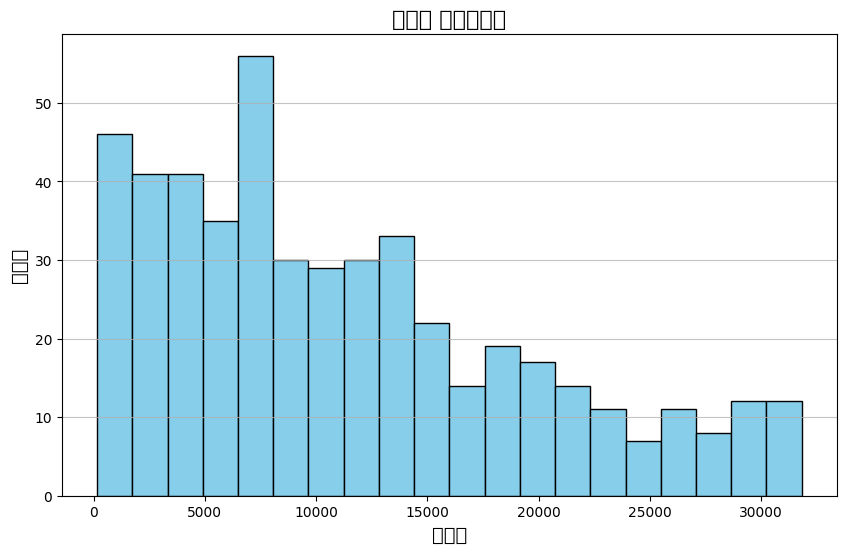

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 예시 (실제 데이터프레임에 맞게 수정)

# '충전량' 열의 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(rapid_df['충전량'], bins=20, color='skyblue', edgecolor='black')
plt.title('충전량 히스토그램', fontsize=16)
plt.xlabel('충전량', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


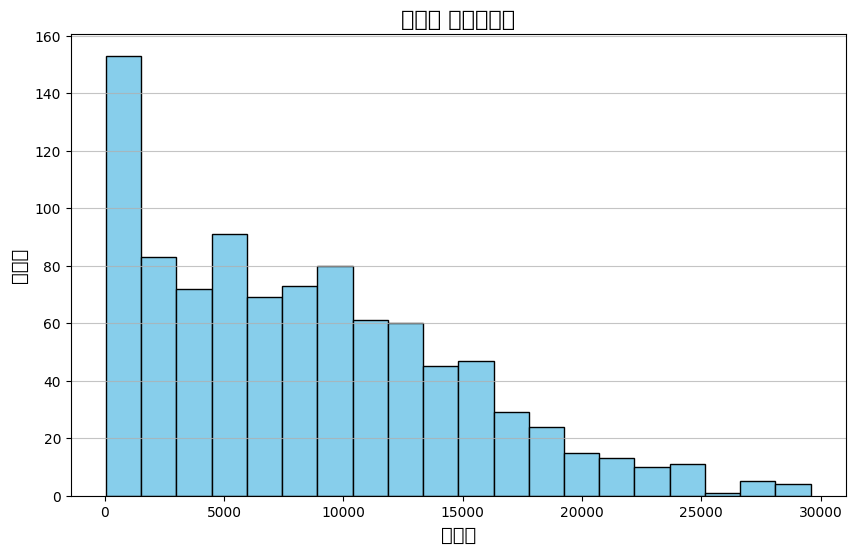

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 예시 (실제 데이터프레임에 맞게 수정)

# '충전량' 열의 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(slow_df['충전량'], bins=20, color='skyblue', edgecolor='black')
plt.title('충전량 히스토그램', fontsize=16)
plt.xlabel('충전량', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [8]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.model_selection import train_test_split

class SMOTER:
    def __init__(self, k_neighbors=5, rare_percentile=5):
        """
        SMOTER for regression.

        Parameters:
        - k_neighbors: int, the number of nearest neighbors for interpolation.
        - rare_percentile: int, the percentile to define rare events.
        """
        self.k_neighbors = k_neighbors
        self.rare_percentile = rare_percentile

    def fit_resample(self, X, y):
        """
        Perform SMOTER on the given dataset.

        Parameters:
        - X: numpy.ndarray, the feature matrix.
        - y: numpy.ndarray, the target values.

        Returns:
        - X_resampled: numpy.ndarray, the resampled feature matrix.
        - y_resampled: numpy.ndarray, the resampled target values.
        """
        # Define rare and common event thresholds
        lower_bound = np.percentile(y, self.rare_percentile)
        upper_bound = np.percentile(y, 100 - self.rare_percentile)

        # Identify rare and common indices
        rare_indices = np.where((y < lower_bound) | (y > upper_bound))[0]
        common_indices = np.where((y >= lower_bound) & (y <= upper_bound))[0]

        # Generate synthetic samples for rare events
        X_rare, y_rare = X[rare_indices], y[rare_indices]
        X_synthetic, y_synthetic = self._generate_synthetic_samples(X_rare, y_rare)

        # Combine rare, synthetic, and common events
        X_resampled = np.vstack([X[common_indices], X_rare, X_synthetic])
        y_resampled = np.hstack([y[common_indices], y_rare, y_synthetic])

        return X_resampled, y_resampled

    def _generate_synthetic_samples(self, X, y):
        """
        Generate synthetic samples using nearest neighbors and interpolation.

        Parameters:
        - X: numpy.ndarray, the feature matrix for rare events.
        - y: numpy.ndarray, the target values for rare events.

        Returns:
        - X_synthetic: numpy.ndarray, the synthetic feature matrix.
        - y_synthetic: numpy.ndarray, the synthetic target values.
        """
        # Fit nearest neighbors
        neigh = NearestNeighbors(n_neighbors=self.k_neighbors + 1)
        neigh.fit(X)
        neighbors = neigh.kneighbors(X, return_distance=False)[:, 1:]

        # Generate synthetic samples
        X_synthetic = []
        y_synthetic = []
        for i in range(len(X)):
            for _ in range(self.k_neighbors):
                nn_idx = neighbors[i][np.random.randint(self.k_neighbors)]
                alpha = np.random.rand()
                X_new = X[i] + alpha * (X[nn_idx] - X[i])
                y_new = y[i] + alpha * (y[nn_idx] - y[i])
                X_synthetic.append(X_new)
                y_synthetic.append(y_new)

        return np.array(X_synthetic), np.array(y_synthetic)


X = rapid_df.iloc[:, :-1].values  # 독립변수
y = rapid_df.iloc[:, -1].values   # 종속변수


    # Apply SMOTER
smoter = SMOTER(k_neighbors=4, rare_percentile=8)
X_resampled, y_resampled = smoter.fit_resample(X, y)

    # Print results
print("Original dataset size:", len(X))
print("Resampled dataset size:", len(X_resampled))


feature_columns = rapid_df.columns[:-1]  # 독립 변수 열 이름
target_column = rapid_df.columns[-1]    # 종속 변수 열 이름

# Resampled 데이터를 데이터프레임으로 변환
X_resampled_df = pd.DataFrame(X_resampled, columns=feature_columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=[target_column])

# 독립 변수와 종속 변수를 결합하여 최종 데이터프레임 생성
rapid_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)


Original dataset size: 488
Resampled dataset size: 800


In [9]:
X = slow_df.iloc[:, :-1].values  # 독립변수
y = slow_df.iloc[:, -1].values   # 종속변수


    # Apply SMOTER
smoter = SMOTER(k_neighbors=2, rare_percentile=5)
X_resampled, y_resampled = smoter.fit_resample(X, y)

    # Print results
print("Original dataset size:", len(X))
print("Resampled dataset size:", len(X_resampled))


feature_columns = slow_df.columns[:-1]  # 독립 변수 열 이름
target_column = slow_df.columns[-1]    # 종속 변수 열 이름

# Resampled 데이터를 데이터프레임으로 변환
X_resampled_df = pd.DataFrame(X_resampled, columns=feature_columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=[target_column])

# 독립 변수와 종속 변수를 결합하여 최종 데이터프레임 생성
slow_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

Original dataset size: 946
Resampled dataset size: 1138


In [10]:
X = all_df.iloc[:, :-1].values  # 독립변수
y = all_df.iloc[:, -1].values   # 종속변수


    # Apply SMOTER
smoter = SMOTER(k_neighbors=1, rare_percentile=5)
X_resampled, y_resampled = smoter.fit_resample(X, y)

    # Print results
print("Original dataset size:", len(X))
print("Resampled dataset size:", len(X_resampled))


feature_columns = all_df.columns[:-1]  # 독립 변수 열 이름
target_column = all_df.columns[-1]    # 종속 변수 열 이름

# Resampled 데이터를 데이터프레임으로 변환
X_resampled_df = pd.DataFrame(X_resampled, columns=feature_columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=[target_column])

# 독립 변수와 종속 변수를 결합하여 최종 데이터프레임 생성
all_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

Original dataset size: 1434
Resampled dataset size: 1578


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

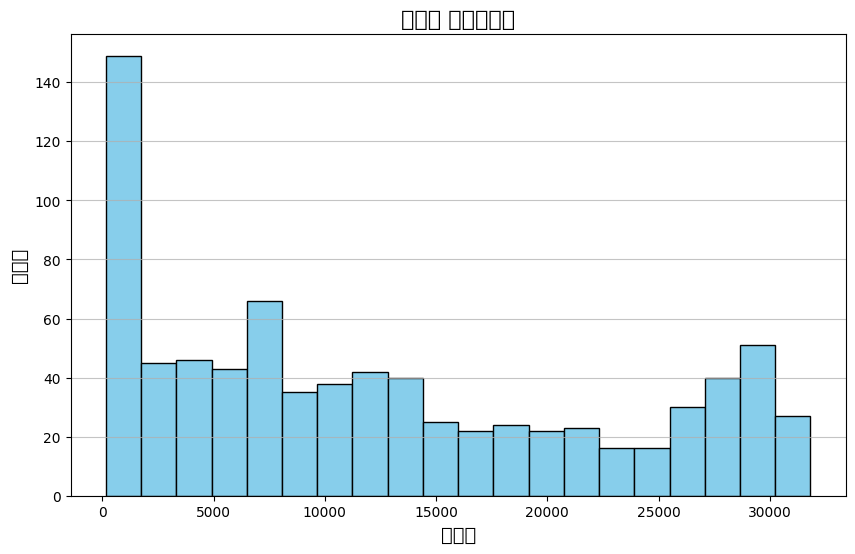

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 예시 (실제 데이터프레임에 맞게 수정)

# '충전량' 열의 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(rapid_df['충전량'], bins=20, color='skyblue', edgecolor='black')
plt.title('충전량 히스토그램', fontsize=16)
plt.xlabel('충전량', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

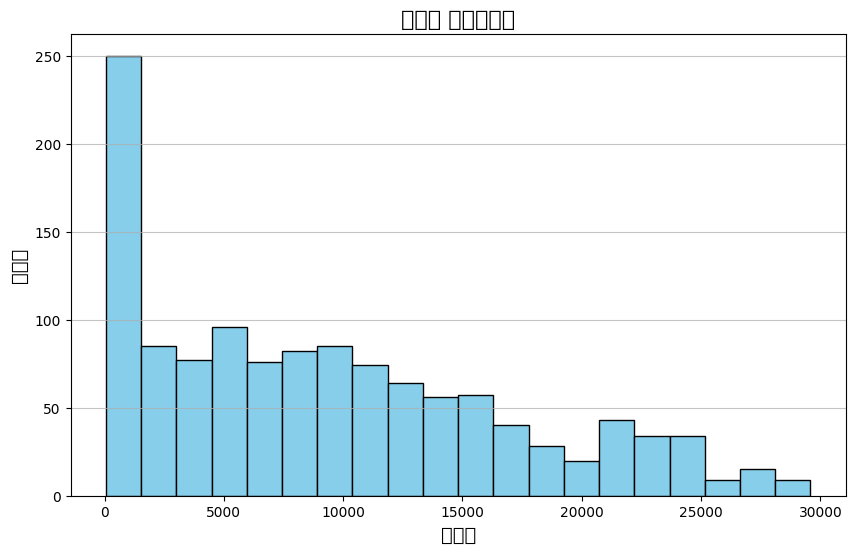

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 예시 (실제 데이터프레임에 맞게 수정)

# '충전량' 열의 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.hist(slow_df['충전량'], bins=20, color='skyblue', edgecolor='black')
plt.title('충전량 히스토그램', fontsize=16)
plt.xlabel('충전량', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
rapid_df

In [ ]:
slow_df

## 다중회귀

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# 마지막 열을 종속 변수로 설정
dependent_variable = rapid_df.columns[-1]
X = all_df.iloc[:, :-1]  # 마지막 열을 제외한 독립 변수들
y = all_df[dependent_variable]  # 마지막 열 (종속 변수)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 스케일링
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터 스케일링

# 다중 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력 (소수 셋째 자리로 제한)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


# 회귀 계수 및 절편 확인
coefficients = [round(coef, 3) for coef in model.coef_]  # 소수 셋째 자리로 제한
intercept = round(model.intercept_, 3)

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 49878501.254
R-squared: 0.128
RMSE: 7062.471
MAE: 5707.079554384631
Coefficients: [75.986, -3.178, 1119.213, 308.22, 600.653, -1813.036, -1426.302, 198.547, -146.029, 377.522, 412.82, -108.014, -335.54, 259.835, 91.393, 476.173, -1897.436, 489.761, 653.544, 193.402, 1919.054, -1332.738, -781.796, 1318.001, -43.193, -691.647, 1675.852, -1745.56, 400.668, 489.615, 447.001, -144.591, 589.14, 190.657, -788.054, -1116.389, -605.354, -781.283, 492.824, -114.992, -1397.871, -661.938, -30.494, -633.077, 251.425, -78.052, -140.261, 270.86, -509.049, 843.657, 0.207, 778.125, 14.506, 93.244, 357.934, -2633.506, 724.434, 242.452, -733.161, 2681.516, -520.851, -84.405, 963.493, 129.312, 25.123, 838.762, -74.796, -494.531, -773.004, 25.724, -1156.71, 1681.978, 1055.772, -122.701, -333.363, 702.765, -62.518, -540.965, 455.797, 56.422, -918.491, -239.415, -1489.353, 152.751, -397.585, -350.557, 121.439, -411.422, -196.488, -1348.257, -1180.073, 1676.054, -9.326, 307.13, 1316.428, -

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# 마지막 열을 종속 변수로 설정
dependent_variable = rapid_df.columns[-1]
X = rapid_df.iloc[:, :-1]  # 마지막 열을 제외한 독립 변수들
y = rapid_df[dependent_variable]  # 마지막 열 (종속 변수)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 스케일링
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터 스케일링

# 다중 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력 (소수 셋째 자리로 제한)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


# 회귀 계수 및 절편 확인
coefficients = [round(coef, 3) for coef in model.coef_]  # 소수 셋째 자리로 제한
intercept = round(model.intercept_, 3)

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 68934058.220
R-squared: 0.276
RMSE: 8302.654
MAE: 6528.661827265045
Coefficients: [1838.049, 584.387, 694.784, -664.663, 2614.578, -2392.851, 289.079, 1287.825, 240.141, 1479.725, -1005.226, 1003.646, 1356.38, -39.945, 625.528, 474.556, -4700.239, 313.252, 1860.68, 1650.313, 864.789, -644.33, 378.628, 3102.071, -996.451, 1031.874, 5411.437, -1331.595, 248.543, -1173.908, -1102.902, -662.224, -1207.875, 902.294, -2715.512, -1644.36, -1025.916, -350.406, 160.756, 335.883, -221.078, -279.528, -1494.29, -1073.136, 335.948, 1159.176, -408.876, -93.373, -285.188, 1700.174, 980.952, 377.786, 768.598, 766.13, -712.852, -4619.46, 1365.764, -544.198, -768.705, 2466.404, 1571.671, -928.6, -1340.379, 1352.655, 103.034, 1126.273, 101.764, -1223.779, -1018.582, -1065.568, -2581.593, 2614.643, 948.972, -363.95, 318.054, -1704.835, -77.283, -615.523, -1258.598, -153.863, 1309.736, -699.982, -1302.573, -726.296, -435.241, 477.189, 171.575, -592.876, 266.822, -2209.642, -1464.389, 29

In [33]:
import statsmodels.api as sm

# 데이터에 상수항 추가 (절편을 포함하기 위함)
X_with_const = sm.add_constant(X)  # 상수항 추가

# OLS(최소제곱법)를 사용한 회귀 분석
model = sm.OLS(y, X_with_const).fit()

# 회귀 분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    충전량   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     2.627
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.00e-12
Time:                        15:34:25   Log-Likelihood:                -7062.2
No. Observations:                 688   AIC:                         1.431e+04
Df Residuals:                     594   BIC:                         1.474e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np

# 데이터 예제
# rapid_df = pd.read_csv("your_dataset.csv")  # 사용자 데이터 로드

# 마지막 열을 종속 변수로 설정
dependent_variable = rapid_df.columns[-1]
X = rapid_df.iloc[:, :-1]  # 마지막 열을 제외한 독립 변수들
y = rapid_df[dependent_variable]  # 마지막 열 (종속 변수)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 스케일링
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터 스케일링

# 다중 선형 회귀 모델 생성 및 훈련
model = LinearRegression()

# 교차 검증 설정 (5-폴드)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

# 교차 검증 결과 출력
print("Cross-Validation MSE scores:", -cv_scores)
print("Mean CV MSE:", -np.mean(cv_scores))

Cross-Validation MSE scores: [68146898.08311838 47335391.22713166 54242307.88778652 43659012.81562908
 39596602.74641843 44957364.27628148 51188074.12369389 51630540.74642763
 62070979.30591658 61817303.93624442]
Mean CV MSE: 52464447.51486481


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# 마지막 열을 종속 변수로 설정
dependent_variable = slow_df.columns[-1]
X = slow_df.iloc[:, :-1]  # 마지막 열을 제외한 독립 변수들
y = slow_df[dependent_variable]  # 마지막 열 (종속 변수)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 스케일링
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터 스케일링

# 다중 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# 결과 출력 (소수 셋째 자리로 제한)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# 회귀 계수 및 절편 확인
coefficients = [round(coef, 3) for coef in model.coef_]  # 소수 셋째 자리로 제한
intercept = round(model.intercept_, 3)

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 33430256.685
R-squared: 0.359
RMSE: 5781.890
MAE: 4788.841589199456
Coefficients: [96.352, -287.362, 1359.197, 1542.61, 259.665, -1901.186, -1744.08, 1249.823, -871.166, 727.874, -44.554, 319.193, -512.502, 631.699, -578.941, -687.688, -981.751, -131.572, 1379.246, 443.972, 3137.208, 17.507, -397.068, 1158.399, -186.261, -460.235, 851.888, -2123.259, 1627.079, 881.084, -299.79, 1.609, 738.547, -271.068, 195.865, -921.966, -218.576, -1236.724, 974.686, -706.228, -1421.463, -803.599, 66.613, -123.181, -1307.889, -50.143, -367.424, 1175.887, -1047.4, -14.006, 170.229, 935.472, 242.2, 206.081, 716.076, -1764.472, 326.35, -318.634, -2914.208, 2891.931, -1012.448, -689.988, 2847.714, 255.994, 304.218, 857.983, -1006.347, -272.589, -611.266, 1004.866, -302.7, 929.476, -112.035, 50.835, -458.902, 870.935, 289.855, 764.294, 2751.305, -719.218, -815.946, 221.997, -1762.5, 1180.358, -1859.377, -671.199, 133.691, -193.555, -5.019, -354.042, -1970.465, 2040.573, 311.619, -131.49

In [36]:
import statsmodels.api as sm

# 데이터에 상수항 추가 (절편을 포함하기 위함)
X_with_const = sm.add_constant(X)  # 상수항 추가

# OLS(최소제곱법)를 사용한 회귀 분석
model = sm.OLS(y, X_with_const).fit()

# 회귀 분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    충전량   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     4.488
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           4.41e-34
Time:                        15:34:30   Log-Likelihood:                -11425.
No. Observations:                1146   AIC:                         2.304e+04
Df Residuals:                    1052   BIC:                         2.351e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np

# 데이터 예제
# rapid_df = pd.read_csv("your_dataset.csv")  # 사용자 데이터 로드

# 마지막 열을 종속 변수로 설정
dependent_variable = slow_df.columns[-1]
X = slow_df.iloc[:, :-1]  # 마지막 열을 제외한 독립 변수들
y = slow_df[dependent_variable]  # 마지막 열 (종속 변수)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 스케일링
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터 스케일링

# 다중 선형 회귀 모델 생성 및 훈련
model = LinearRegression()

# 교차 검증 설정 (5-폴드)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

# 교차 검증 결과 출력
print("Cross-Validation MSE scores:", -cv_scores)
print("Mean CV MSE:", -np.mean(cv_scores))

Cross-Validation MSE scores: [35346745.80676194 41740790.00336775 39779927.95492285 52380946.00296551
 46633803.50846685 45069193.27070642 48219884.25108165 41835897.89970013
 40306718.824526   37008841.76302546]
Mean CV MSE: 42832274.92855246


##Pycaret을 이용한 모델 성능 비교

In [ ]:
pip install pycaret[full]

In [11]:
# PyCaret 설치 (필요 시 실행)
# !pip install pycaret[full]

import pandas as pd
from pycaret.regression import setup, compare_models, pull, finalize_model, predict_model


# 독립 변수와 종속 변수 분리
# PyCaret에서는 전체 데이터셋을 넣고 종속 변수(target)를 지정하면 됨
target_column = '충전량'  # 종속 변수의 이름으로 변경하세요

# PyCaret 설정
regression_setup = setup(
    data=all_df,
    target=target_column,
    train_size=0.8,
    session_id=42,  # 랜덤 시드 설정
    normalize=True, # 데이터 스케일링 자동 적용

)

# 모델 비교 (AutoML)
best_model = compare_models(sort='MSE')  # 모델들을 비교하고 MSE 기준으로 가장 좋은 모델 선택

# 모델 성능 요약 출력
results = pull()
print(results)

# 최종 모델 학습
final_model = finalize_model(best_model)

# 테스트 데이터 예측 (PyCaret의 predict_model 사용)
predictions = predict_model(final_model)
print(predictions.head())


,Description,Value
0,Session id,42
1,Target,충전량
2,Target type,Regression
3,Original data shape,"(1578, 98)"
4,Transformed data shape,"(1578, 98)"
5,Transformed train set shape,"(1262, 98)"
6,Transformed test set shape,"(316, 98)"
7,Numeric features,97
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,4137.8993,32462398.6705,5683.6475,0.4736,0.9820,1.8098,2.6690
catboost,CatBoost Regressor,4148.9749,32661546.6784,5701.9546,0.4700,0.9866,1.8770,21.0750
et,Extra Trees Regressor,4187.7007,33662071.2619,5783.3182,0.4536,0.9987,1.7399,2.1520
rf,Random Forest Regressor,4267.7640,33810859.2090,5802.9130,0.4518,1.0184,2.0552,4.9370
xgboost,Extreme Gradient Boosting,4258.8315,35455495.6000,5936.8958,0.4244,1.0003,1.8319,1.4670
gbr,Gradient Boosting Regressor,4942.8371,40581346.7624,6359.3086,0.3440,1.1454,2.8369,1.6540
dt,Decision Tree Regressor,4570.8292,44766243.9598,6675.2782,0.2745,1.0697,1.8369,0.1070
knn,K Neighbors Regressor,5419.1445,50271087.6000,7081.6364,0.1855,1.1458,2.4634,0.0530
ada,AdaBoost Regressor,6161.7649,55572704.5275,7448.7603,0.1003,1.3644,4.4477,0.5800
br,Bayesian Ridge,6058.5458,57463847.6000,7570.8130,0.0720,1.3073,3.8297,0.0700


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

                                    Model        MAE           MSE       RMSE  \
lightgbm  Light Gradient Boosting Machine  4137.8993  3.246240e+07  5683.6475   
catboost               CatBoost Regressor  4148.9749  3.266155e+07  5701.9546   
et                  Extra Trees Regressor  4187.7007  3.366207e+07  5783.3182   
rf                Random Forest Regressor  4267.7640  3.381086e+07  5802.9130   
xgboost         Extreme Gradient Boosting  4258.8315  3.545550e+07  5936.8958   
gbr           Gradient Boosting Regressor  4942.8371  4.058135e+07  6359.3086   
dt                Decision Tree Regressor  4570.8292  4.476624e+07  6675.2782   
knn                 K Neighbors Regressor  5419.1445  5.027109e+07  7081.6364   
ada                    AdaBoost Regressor  6161.7649  5.557270e+07  7448.7603   
br                         Bayesian Ridge  6058.5458  5.746385e+07  7570.8130   
llar         Lasso Least Angle Regression  6035.8772  5.748486e+07  7571.4909   
lasso                    Las

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2868.8353,14987769.4018,3871.4041,0.7448,0.8299,1.5477


      전기, 가스, 증기 및 공기조절 공급업 사업장 수  수도, 하수 및 폐기물 처리, 원료 재생업 사업장 수  건설업 사업장 수  \
1239                          0.0                            3.0      102.0   
813                           0.0                            0.0       87.0   
1174                          0.0                            7.0      205.0   
534                           0.0                            3.0       57.0   
514                           0.0                            0.0       14.0   

      도매 및 소매업 사업장 수  운수 및 창고업 사업장 수  정보통신업 사업장 수  금융 및 보험업  \
1239           243.0           231.0        123.0       8.0   
813            584.0            23.0        144.0      17.0   
1174          1276.0           505.0        358.0     135.0   
534           7385.0            53.0        130.0      85.0   
514             63.0             8.0         12.0       0.0   

      전문, 과학 및 기술 서비스업 사업장 수  공공행정, 국방 및 사회보장 행정 사업장 수  교육 서비스업 사업장 수  ...  \
1239                   178.0                       3.0           37.

## Extra tree(급속)

In [ ]:
pip install bayesian-optimization

In [ ]:
##Extra tree

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from skopt.callbacks import VerboseCallback


# 데이터 생성
X = rapid_df.iloc[:, :-1]  # 마지막 열 제외
y = rapid_df.iloc[:, -1]   # 마지막 열

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 탐색 공간 정의
param_space = {
    'n_estimators': (100, 1000),  # 트리 개수
    'max_depth': (5, 50),       # 최대 깊이
    'min_samples_split': (2, 20),  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': (1, 10),   # 리프 노드에 필요한 최소 샘플 수
    'max_features': (0.1, 1.0, 'uniform')  # 각 분할에서 고려할 최대 특징 수 비율
}

# Extra Trees 모델 정의
model = ExtraTreesRegressor(random_state=42)

# 베이지안 최적화 설정
bayes_opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,  # 탐색 횟수
    scoring='neg_mean_squared_error',  # 평가 지표
    cv=5,  # 교차 검증 횟수
    n_jobs=-1,  # 병렬 처리
    random_state=42
)

# 진행 상황 출력 콜백
verbose_cb = VerboseCallback(n_total=50)

# 최적화 수행
bayes_opt.fit(X_train_scaled, y_train, callback=[verbose_cb])

# 최적 하이퍼파라미터 출력
print("\nBest Parameters:", bayes_opt.best_params_)
print("Best Score (MSE):", -bayes_opt.best_score_)  # neg_mean_squared_error이므로 부호 변경

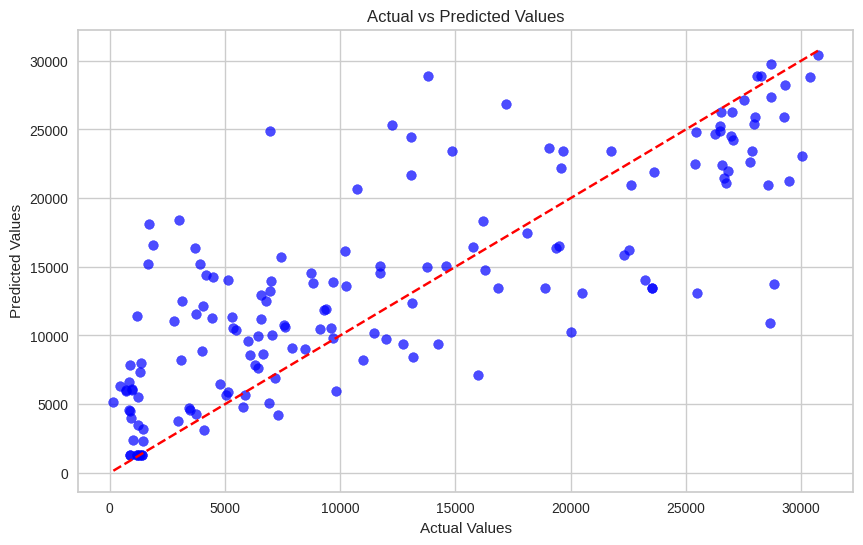

Mean Squared Error (MSE): 37564192.6853
Mean Absolute Error (MAE): 4596.9065
R^2 Score: 0.6087
Adjusted R^2 Score: -0.0034


In [13]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# 데이터 준비
X = rapid_df.iloc[:, :-1]  # 마지막 열 제외
y = rapid_df.iloc[:, -1]   # 마지막 열
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Extra Trees 모델 학습
model = ExtraTreesRegressor(
    n_estimators=500,  # 트리 개수
    max_depth= None,       # 최대 깊이
    min_samples_split= 2,  # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf= 2,   # 리프 노드에 필요한 최소 샘플 수
    max_features= 0.8280549754624964,  # 각 분할에서 고려할 최대 특징 수 비율
    random_state=42
    )

model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# 결과 출력
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Adjusted R^2 Score: {adjusted_r2:.4f}")

Mean Cross-Validation MSE: 17665527.5847


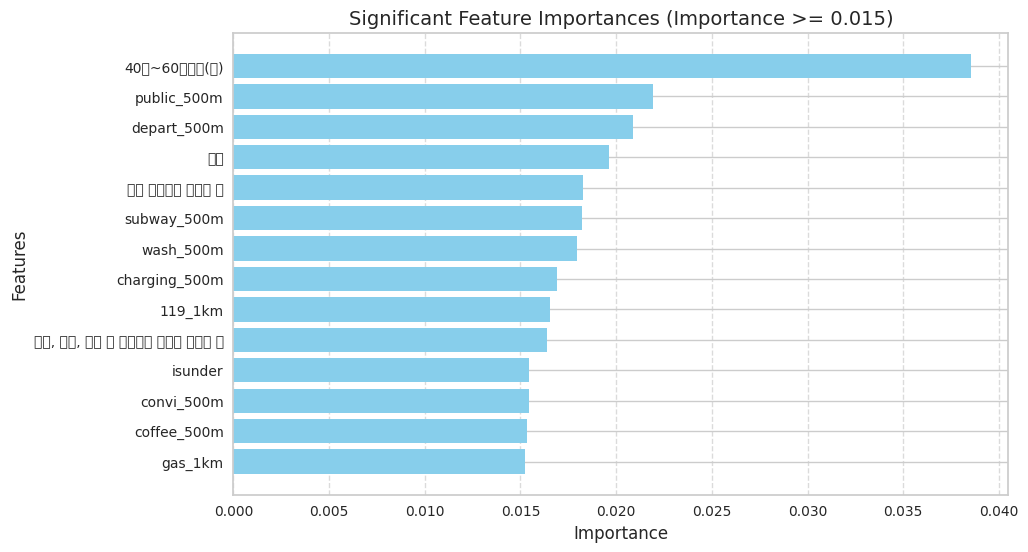

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

plt.rc('font', family='NanumBarunGothic')

# 데이터 준비
X = slow_df.iloc[:, :-1]  # 마지막 열 제외
y = slow_df.iloc[:, -1]   # 마지막 열
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Extra Trees 모델 정의
model = ExtraTreesRegressor(
    n_estimators=500,  # 트리 개수
    max_depth= None,       # 최대 깊이
    min_samples_split= 2,  # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf= 2,   # 리프 노드에 필요한 최소 샘플 수
    max_features= 0.8280549754624964,  # 각 분할에서 고려할 최대 특징 수 비율
    random_state=42
    )

# 교차 검증
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)

print(f"Mean Cross-Validation MSE: {mean_cv_score:.4f}")

# 모델 학습
model.fit(X_train_scaled, y_train)

feature_importances = model.feature_importances_
important_features = pd.DataFrame({
    'Feature': X.columns,  # 데이터프레임 열 이름 사용
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 중요도가 0.015 이상인 Feature 선택
significant_features = important_features[important_features['Importance'] >= 0.015]


# 시각화
plt.figure(figsize=(10, 6))
plt.barh(significant_features['Feature'], significant_features['Importance'], color='skyblue')
plt.title('Significant Feature Importances (Importance >= 0.015)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()  # 중요도가 높은 항목이 상단에 위치하도록 설정
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Extra Tree(완속)

In [ ]:
pip install bayesian-optimization

In [123]:
##Extra tree

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from skopt.callbacks import VerboseCallback


# 데이터 생성
X = slow_df.iloc[:, :-1]  # 마지막 열 제외
y = slow_df.iloc[:, -1]   # 마지막 열

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 탐색 공간 정의
param_space = {
    'n_estimators': (100, 1000),  # 트리 개수
    'max_depth': (5, 50),       # 최대 깊이
    'min_samples_split': (2, 20),  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': (1, 10),   # 리프 노드에 필요한 최소 샘플 수
    'max_features': (0.1, 1.0, 'uniform')  # 각 분할에서 고려할 최대 특징 수 비율
}

# Extra Trees 모델 정의
model = ExtraTreesRegressor(random_state=42)

# 베이지안 최적화 설정
bayes_opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=80,  # 탐색 횟수
    scoring='neg_mean_squared_error',  # 평가 지표
    cv=5,  # 교차 검증 횟수
    n_jobs=-1,  # 병렬 처리
    random_state=42
)

# 진행 상황 출력 콜백
verbose_cb = VerboseCallback(n_total=50)

# 최적화 수행
bayes_opt.fit(X_train_scaled, y_train, callback=[verbose_cb])

# 최적 하이퍼파라미터 출력
print("\nBest Parameters:", bayes_opt.best_params_)
print("Best Score (MSE):", -bayes_opt.best_score_)  # neg_mean_squared_error이므로 부호 변경

Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 18.8497
Function value obtained: 21488503.5553
Current minimum: 21488503.5553
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 31.8549
Function value obtained: 19782305.4708
Current minimum: 19782305.4708
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 13.4642
Function value obtained: 17742556.8435
Current minimum: 17742556.8435
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 6.7047
Function value obtained: 21742589.0889
Current minimum: 17742556.8435
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optima

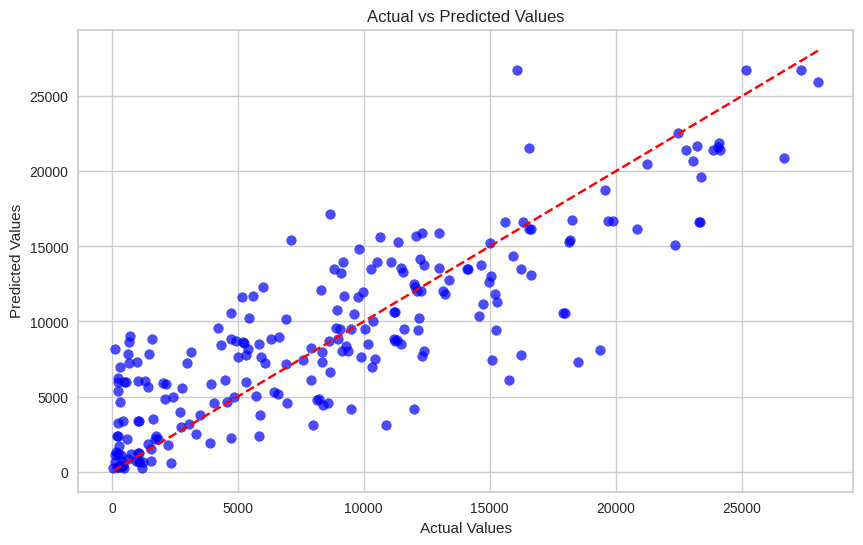

Mean Squared Error (MSE): 13644647.6160
Mean Absolute Error (MAE): 2772.4926
R^2 Score: 0.7228
Adjusted R^2 Score: 0.5160


In [13]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# 데이터 준비
X = slow_df.iloc[:, :-1]  # 마지막 열 제외
y = slow_df.iloc[:, -1]   # 마지막 열
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Extra Trees 모델 학습
model = ExtraTreesRegressor(
    n_estimators=1000,  # 트리 개수
    max_depth= None,       # 최대 깊이
    min_samples_split= 3,  # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf= 2,   # 리프 노드에 필요한 최소 샘플 수
    max_features= 0.8280549754624964,  # 각 분할에서 고려할 최대 특징 수 비율
    random_state=42
    )

model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# 결과 출력
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Adjusted R^2 Score: {adjusted_r2:.4f}")


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

plt.rc('font', family='NanumBarunGothic')

# 데이터 준비
X = slow_df.iloc[:, :-1]  # 마지막 열 제외
y = slow_df.iloc[:, -1]   # 마지막 열
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Extra Trees 모델 정의
model = ExtraTreesRegressor(
    n_estimators=1000,  # 트리 개수
    max_depth= None,       # 최대 깊이
    min_samples_split= 3,  # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf= 2,   # 리프 노드에 필요한 최소 샘플 수
    max_features= 0.8280549754624964,  # 각 분할에서 고려할 최대 특징 수 비율
    random_state=42
    )

# 교차 검증
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)

print(f"Mean Cross-Validation MSE: {mean_cv_score:.4f}")


## Extra tree(all)

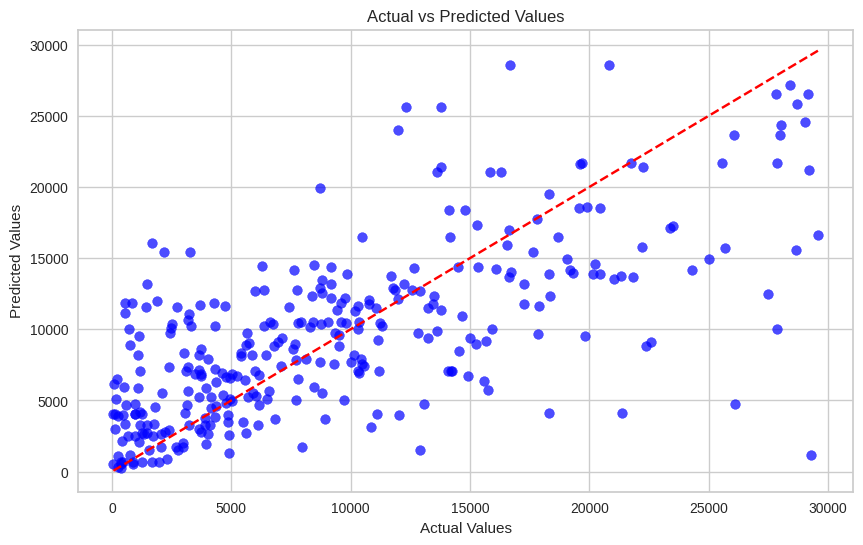

Mean Squared Error (MSE): 31683258.2142
Mean Absolute Error (MAE): 4045.7833
R^2 Score: 0.4605
Adjusted R^2 Score: 0.2205


In [12]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# 데이터 준비
X = all_df.iloc[:, :-1]  # 마지막 열 제외
y = all_df.iloc[:, -1]   # 마지막 열
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Extra Trees 모델 학습
model = ExtraTreesRegressor(
    n_estimators=1000,  # 트리 개수
    max_depth= None,       # 최대 깊이
    min_samples_split= 3,  # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf= 2,   # 리프 노드에 필요한 최소 샘플 수
    max_features= 0.8280549754624964,  # 각 분할에서 고려할 최대 특징 수 비율
    random_state=42
    )

model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# 결과 출력
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Adjusted R^2 Score: {adjusted_r2:.4f}")

## Shap

In [1]:
pip install shap

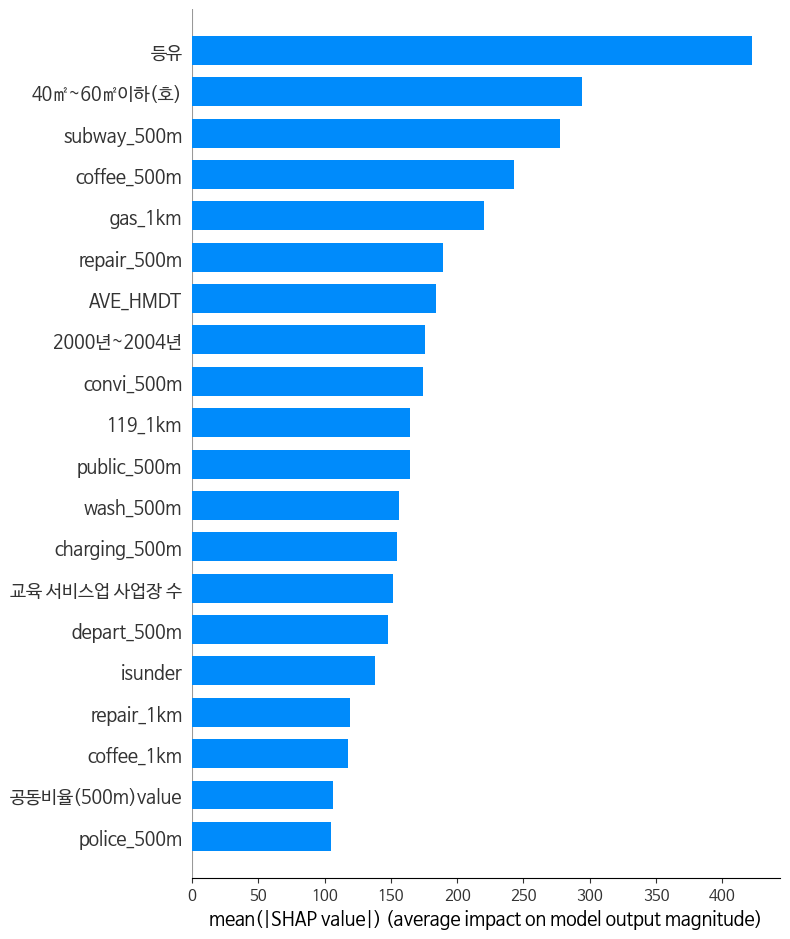

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  pl.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


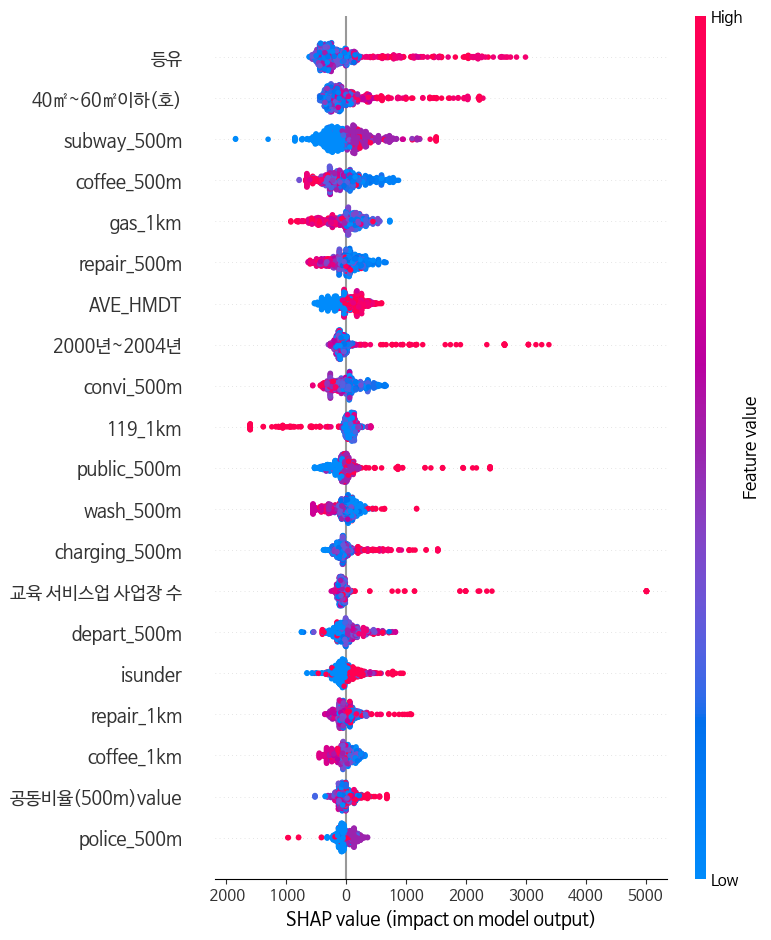

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 데이터 준비
X = slow_df.iloc[:, :-1]  # 마지막 열 제외
y = slow_df.iloc[:, -1]   # 마지막 열

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)


# ExtraTrees 모델 학습
model = ExtraTreesRegressor(
    n_estimators=1000,  # 트리 개수
    max_depth= None,       # 최대 깊이
    min_samples_split= 3,  # 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf= 2,   # 리프 노드에 필요한 최소 샘플 수
    max_features= 0.8280549754624964,  # 각 분할에서 고려할 최대 특징 수 비율
    random_state=42
    )
model.fit(X_scaled, y_train)

# SHAP 값 계산
explainer = shap.TreeExplainer(model)

shap_values = explainer(X_scaled)



# 1. 전체 피처 중요도 시각화 (summary_plot)
shap.summary_plot(shap_values, X_scaled, plot_type="bar")

# 2. 각 피처의 영향력 및 분포 시각화
shap.summary_plot(shap_values, X_scaled)

In [ ]:
# 1. 전체 피처 중요도 시각화 (summary_plot)
shap.summary_plot(shap_values, X_scaled, plot_type="bar")

In [ ]:
# 2. 각 피처의 영향력 및 분포 시각화
shap.summary_plot(shap_values, X_scaled)

/usr/local/lib/python3.10/dist-packages/shap/plots/_waterfall.py:237: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


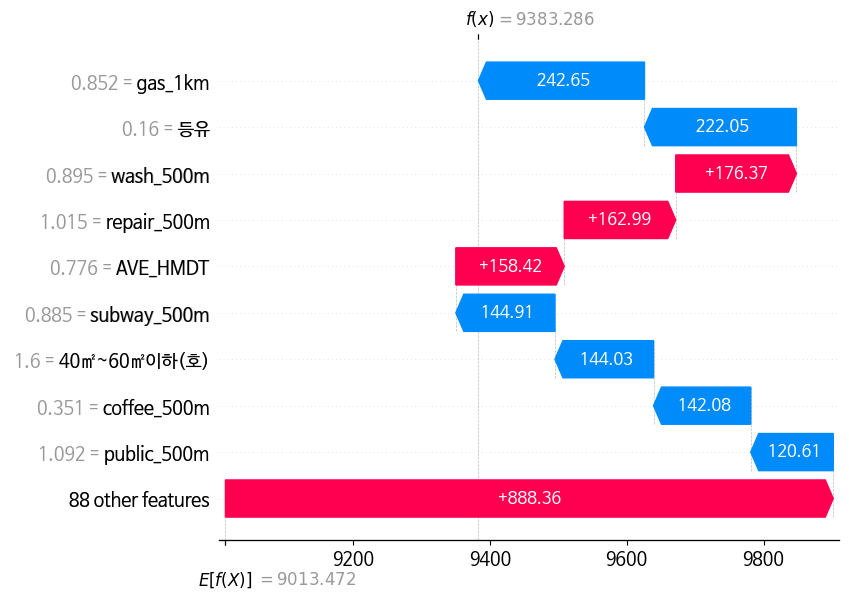

In [15]:
shap.plots.waterfall(shap_values[0])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


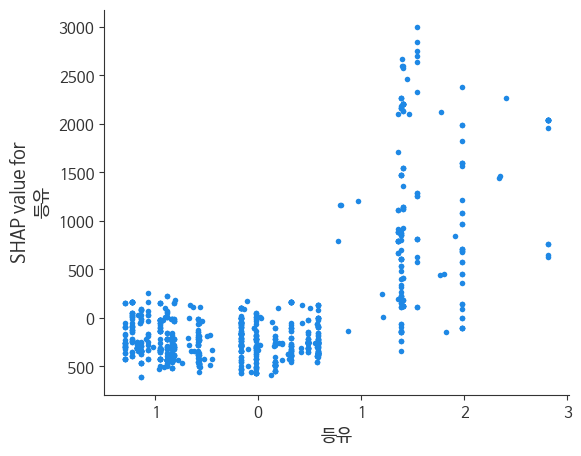

In [16]:
# 3. 특정 피처의 의존도 시각화
shap.dependence_plot("등유", shap_values, X_scaled, interaction_index=None)

## 기타

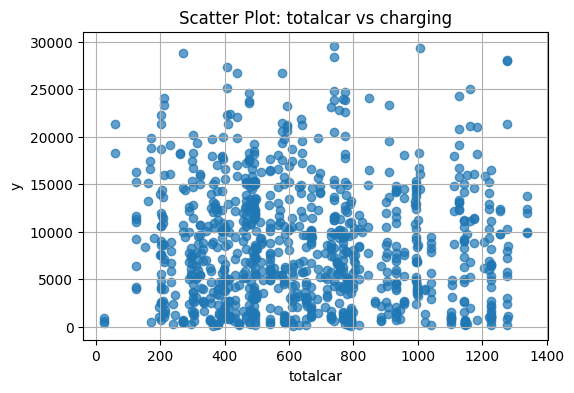

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


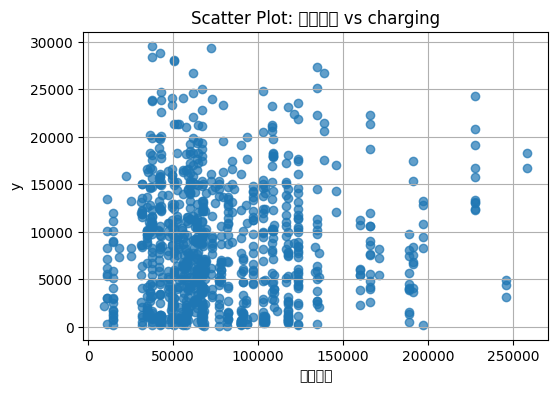

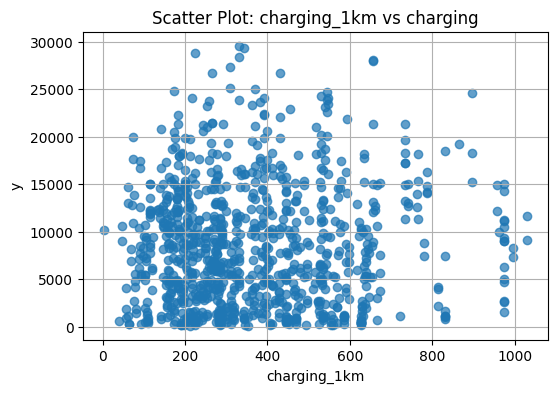

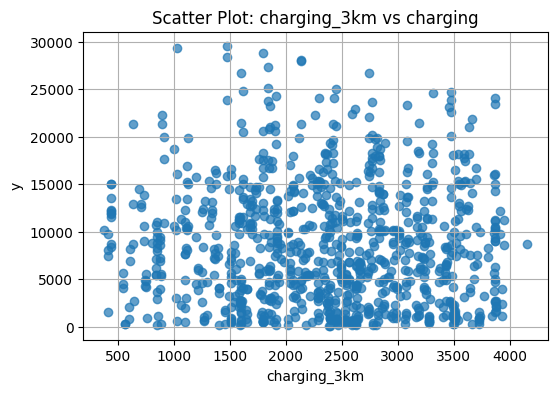

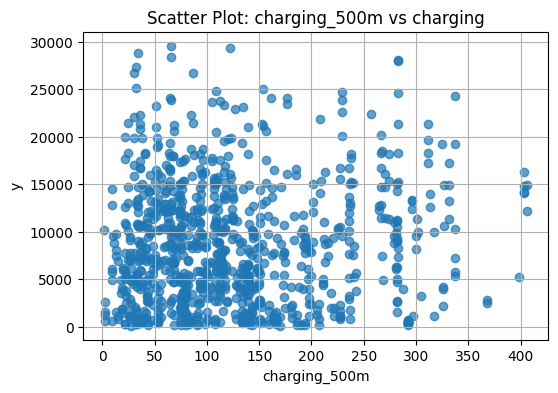

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


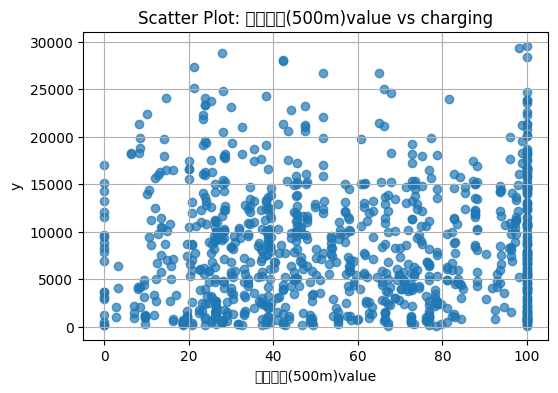

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


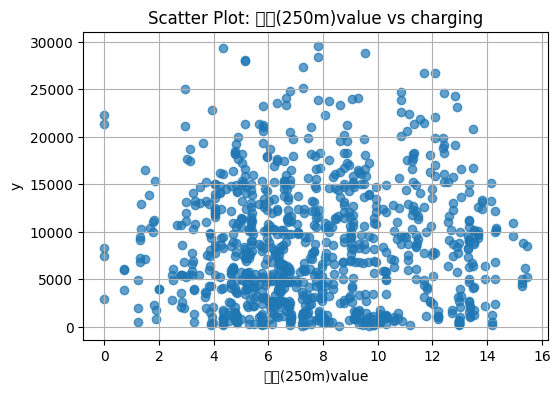

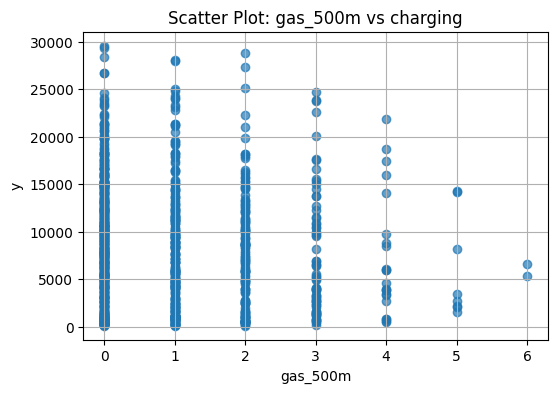

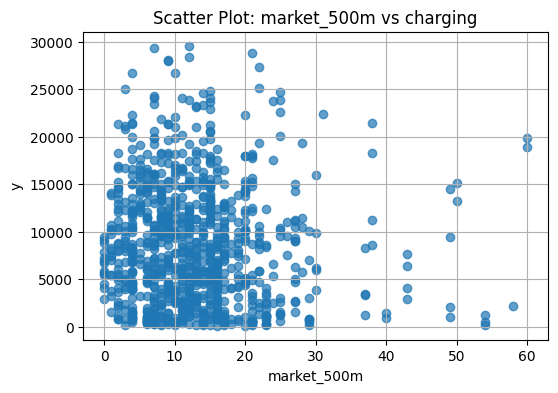

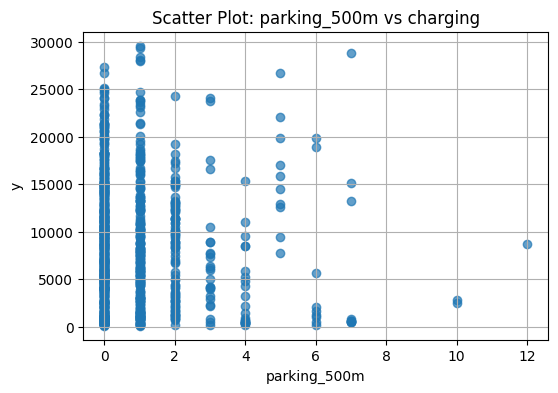

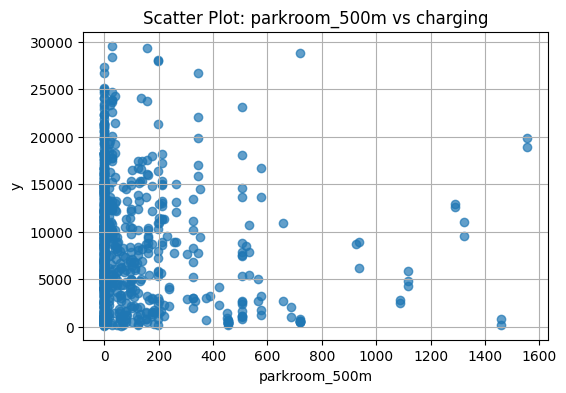

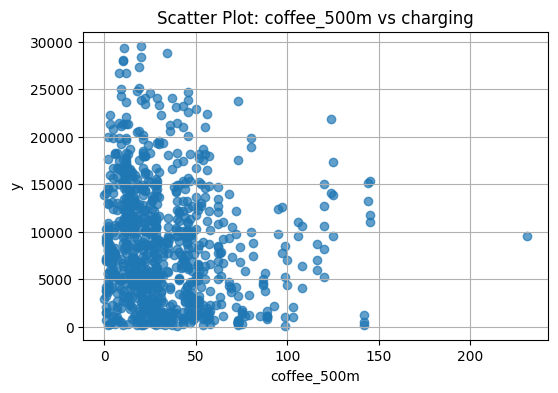

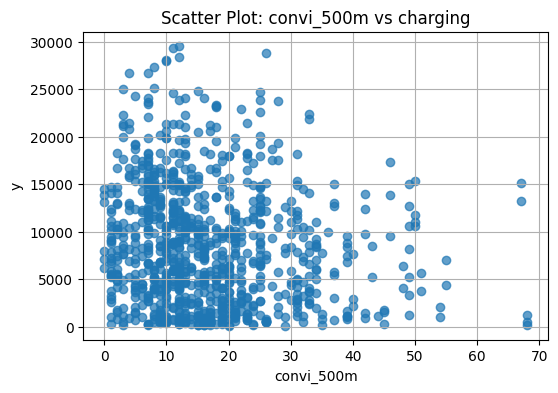

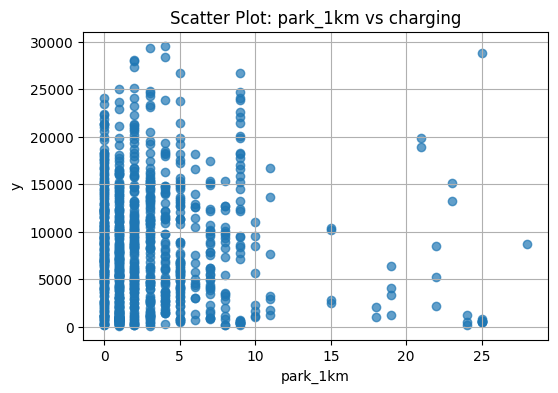

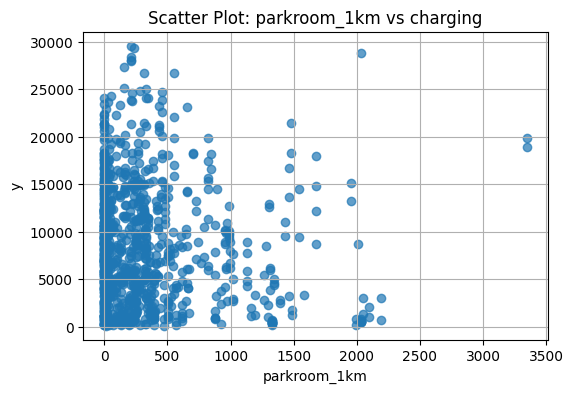

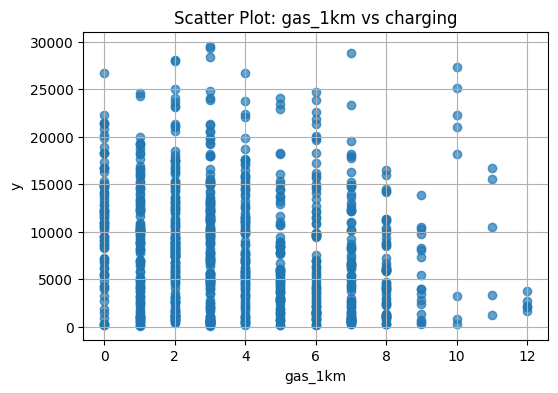

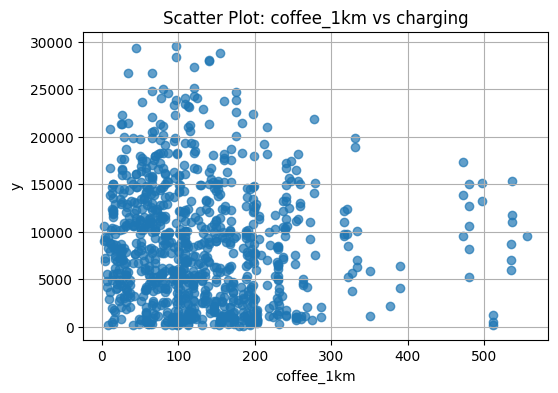

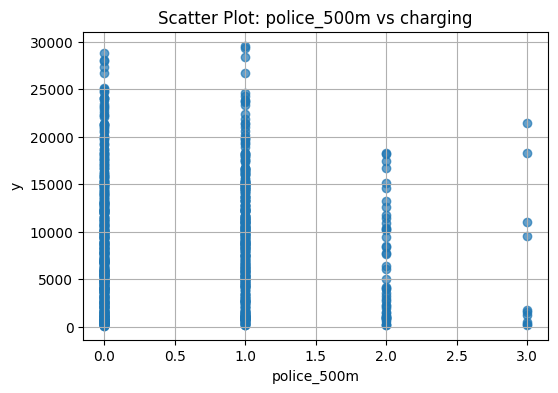

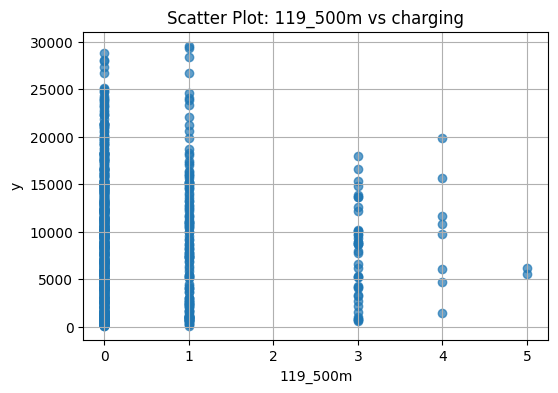

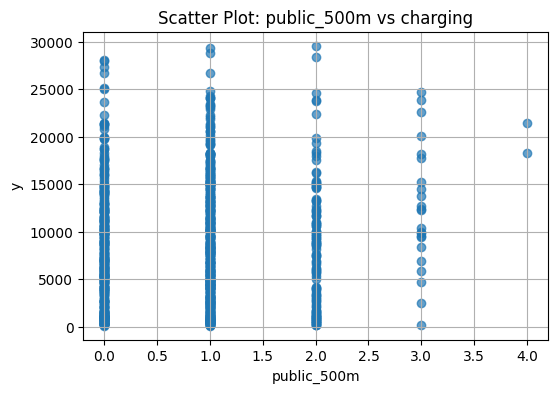

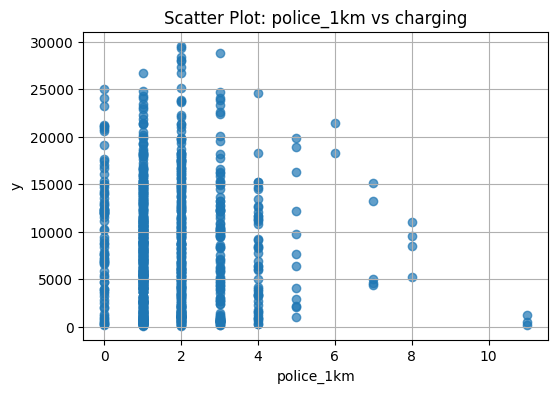

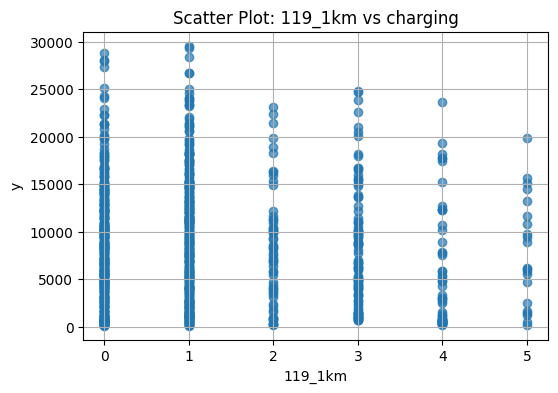

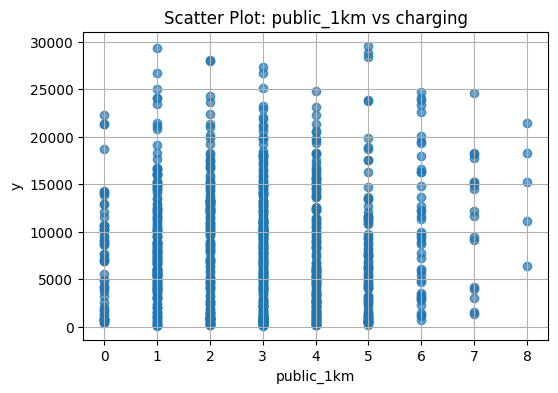

In [ ]:
# 독립변수 리스트
independent_vars = ["totalcar", "총교통량", "charging_1km","charging_3km","charging_500m",'공동비율(500m)value',
                    '고속(250m)value', 'gas_500m', 'market_500m',
       'parking_500m', 'parkroom_500m', 'coffee_500m', 'convi_500m',
       'park_1km', 'parkroom_1km', 'gas_1km', 'coffee_1km', 'police_500m',
       '119_500m', 'public_500m', 'police_1km', '119_1km', 'public_1km']

# 개별 scatter plot 그리기
for var in independent_vars:
    plt.figure(figsize=(6, 4))
    plt.scatter(slow_df[var], slow_df["충전량"], alpha=0.7)
    plt.title(f"Scatter Plot: {var} vs charging")
    plt.xlabel(var)
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


In [ ]:
df1.head()

In [ ]:
columns_to_convert = ['충전량']

# 각 열을 float로 변환 (변환 불가능한 값은 제거)
for column in columns_to_convert:
    df1[column] = pd.to_numeric(df1[column], errors='coerce')  # 변환 불가능한 값을 NaN으로 처리

# NaN이 포함된 행 제거
df1 = df1.dropna(subset=columns_to_convert)

In [ ]:
df1=df1[df1['시도']=='서울특별시']

df1

,시도,구군,본부,사업소,충전소ID,충전소명,주소,충전기ID,충전기명,용도,충전기용량,충전기방식,충전구분,충전량,충전시간(시),충전시간(분),충전종료일,충전시작시간,충전종료시간
2,서울특별시,성북구,서울,강북성북,2382,삼선 SK뷰 아파트,"서울특별시 성북구 삼선교로16길 35 (삼선동3가, 삼선 SK VIEW 아파트)",6526,완속02,아파트용,7.0,BC타입5핀(완속),완속,22.70,3,35,2024-09-30,2024-09-30 20:23:58,2024-09-30 23:59:33
6,서울특별시,양천구,남서울,강서양천,4615,경창시장 고객주차장,서울특별시 양천구 월정로 46 (신월동),10871,급속01,공용,50,DC콤보(급속),급속,13.02,0,27,2024-09-30,2024-09-30 23:31:41,2024-09-30 23:58:52
15,서울특별시,강북구,서울,강북성북,1016,래미안미아1차 아파트,서울특별시 강북구 미아동 삼양로 256,3107,급속01,아파트용,50.0,DC차데모+DC콤보+AC3상(급속),급속,57.80,1,19,2024-09-30,2024-09-30 22:37:55,2024-09-30 23:57:24
26,서울특별시,서대문구,서울,서대문은평,3146,연희동성원아파트,"서울특별시 서대문구 연희로32길 48 (연희동, 연희동성원아파트)",8201,급속01,아파트용,50,DC차데모+DC콤보+AC3상(급속),급속,26.90,1,8,2024-09-30,2024-09-30 22:46:40,2024-09-30 23:55:15
53,서울특별시,노원구,서울,노원도봉,2764,중계우성3차아파트,서울특별시 노원구 중계동 덕릉로 613,7306,완속02,아파트용,7.0,BC타입5핀(완속),완속,11.30,3,38,2024-09-30,2024-09-30 20:12:15,2024-09-30 23:51:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310860,서울특별시,송파구,남서울,강동송파,687,가락쌍용1차 아파트,서울특별시 송파구 가락동 동남로 193,2204,완속01,아파트용,7,BC타입5핀(완속),완속,6.10,2,2,2024-09-01,2024-08-31 22:03:16,2024-09-01 00:05:46
310876,서울특별시,도봉구,서울,노원도봉,2379,방학금광포란재,서울특별시 도봉구 방학동 도봉로150바길 26,6516,완속01,아파트용,7.0,BC타입5핀(완속),완속,27.60,4,14,2024-09-01,2024-08-31 19:48:13,2024-09-01 00:03:04
310882,서울특별시,강남구,남서울,강남,950,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,2911,급속01,아파트용,50,DC차데모+DC콤보+AC3상(급속),급속,20.34,0,30,2024-09-01,2024-08-31 23:31:50,2024-09-01 00:02:29
310884,서울특별시,송파구,남서울,강동송파,687,가락쌍용1차 아파트,서울특별시 송파구 가락동 동남로 193,2207,완속04,아파트용,7,BC타입5핀(완속),완속,11.10,1,50,2024-09-01,2024-08-31 22:11:42,2024-09-01 00:02:23


In [ ]:
grouped_data = df1.groupby("충전기ID", as_index=False).agg({
    "충전량": "sum",
    '시도':'first',
    '구군':'first',
    '본부':'first',
    '사업소':'first',
    '충전소ID':'first',
    '주소':'first',
    '충전기명':'first',
    '용도':'first',
    '충전구분':'first',
})

grouped_data

,충전기ID,충전량,시도,구군,본부,사업소,충전소ID,주소,충전기명,용도,충전구분
0,10039,186.79,서울특별시,강서구,남서울,강서양천,4040,서울특별시 강서구 마곡중앙4로 74 (마곡동),급속01,공용,급속
1,10040,448.26,서울특별시,양천구,남서울,강서양천,4041,"서울특별시 양천구 목동동로 233 (목동, 한국방송회관)",급속01,공용,급속
2,10041,616.99,서울특별시,강서구,남서울,강서양천,4042,"서울특별시 강서구 마곡서1로 48 (마곡동, 서울남부출입국관리사무소)",급속01,공용,급속
3,10042,207.14,서울특별시,양천구,남서울,강서양천,4043,서울특별시 양천구 목동동로 155 (신정동),급속01,공용,급속
4,10043,23.40,서울특별시,동작구,남서울,관악동작,4044,"서울특별시 동작구 노량진로 47 (대방동, 대방차고쓰레기처리시설)",급속01,공용,급속
...,...,...,...,...,...,...,...,...,...,...,...
1412,MEVE21B1C301,6.63,서울특별시,성북구,환경부,환경부,MEVS21B1C300,서울특별시 성북구 화랑로 296,급속02,공용,급속
1413,MEVE22C1B801,170.73,서울특별시,노원구,환경부,환경부,MEVS22C1B800,서울특별시 노원구 동일로 1697 (상계동),급속02,공용,급속
1414,MEVE22D20501,24.77,서울특별시,동대문구,환경부,환경부,MEVS22D20500,서울특별시 동대문구 회기동 109-140,급속03,공용,급속
1415,MEVE22D20502,13.64,서울특별시,동대문구,환경부,환경부,MEVS22D20500,서울특별시 동대문구 회기로 117-3,급속03,공용,급속


In [ ]:
grouped_data.to_csv("24년_9월_수정.csv", index=False)

In [ ]:
df1= pd.read_csv("/content/1-9월.csv")
df2= pd.read_csv("/content/10-12월.csv")




# 두 데이터프레임 합치기 (합집합)
merged_df = pd.concat([df1, df2], ignore_index=True)


grouped_data = merged_df.groupby("충전기ID", as_index=False).agg({
    "충전량": "sum",
    '시도':'first',
    '시군구':'first',
    '본부':'first',
    '사업소':'first',
    '충전소ID':'first',
    '주소':'first',
    '충전기명':'first',
    '용도':'first',
    '충전구분':'first',
})

grouped_data

,충전기ID,충전량,시도,시군구,본부,사업소,충전소ID,주소,충전기명,용도,충전구분
0,1,336.8588,서울특별시,강남구,None,None,1,서울특별시 강남구 영동대로 512,급속1,업무용,급속
1,40,3101.0400,서울특별시,강북구 강북구,서울,강북성북,10,서울특별시 강북구 강북구 도봉로 242,급속01,공용,급속
2,41,300.2800,서울특별시,강북구,서울,강북성북,3500,서울특별시 강북구 도봉로 242,완속01,업무용,완속
3,42,299.4700,서울특별시,강북구,서울,강북성북,3500,서울특별시 강북구 도봉로 242,완속02,업무용,완속
4,43,242.9100,서울특별시,강북구,서울,강북성북,3500,서울특별시 강북구 도봉로 242,완속03,업무용,완속
...,...,...,...,...,...,...,...,...,...,...,...
1549,12438,991.0600,서울특별시,중구,서울,서울직할,5631,"서울특별시 중구 동호로17길 270 (신당동, 버티공영주차장)",급속01,공용,급속
1550,12439,1927.5300,서울특별시,중구,서울,서울직할,5631,"서울특별시 중구 동호로17길 270 (신당동, 버티공영주차장)",급속02,공용,급속
1551,12446,10545.4200,서울특별시,영등포구,남서울,남서울직할,5639,"서울특별시 영등포구 신풍로 1 (신길동, 영등포제1스포츠센터)",급속01,공용,급속
1552,12447,6928.2000,서울특별시,영등포구,남서울,남서울직할,5639,"서울특별시 영등포구 신풍로 1 (신길동, 영등포제1스포츠센터)",급속02,공용,급속


In [ ]:
grouped_data.to_csv("1-12월.csv", index=False)

In [ ]:
df2=pd.read_excel("/content/한국전력공사_서울시 전기차 충전소 충전량_20220331 (1).xlsx")
df2

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04
...,...,...,...,...,...,...,...,...,...
638697,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50,41.67,1,21,2022-03-31 09:44:33,2022-03-31 11:05:57
638698,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50,29.07,0,44,2022-03-31 12:17:56,2022-03-31 13:02:54
638699,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50,55.65,1,21,2022-03-31 16:57:11,2022-03-31 18:19:04
638700,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50,21.48,1,3,2022-03-31 13:06:18,2022-03-31 14:09:20


In [ ]:
grouped_data = df2.groupby("충전소명", as_index=False).agg({
    "충전량": "sum",
    "충전구분":"first"
})

In [87]:
df1=pd.read_csv("/content/충전기들_위치.csv")

In [ ]:
df1 = df1.fillna('가')

df1

In [92]:
df1['지하'] = df1[['주소', '상세위치']].apply(lambda x: 1 if '지하' in ' '.join(x) else 0, axis=1)

In [93]:
df1

,운영기관,충전소,충전기ID,충전기타입,충전기상태,시설구분(대),시설구분(소),지역,시군구,주소,상세위치,이용가능시간,이용자 제한,충전용량,편의제공,비고,X,Y,지하
0,환경부(한국자동차환경협회),DMC 산학협력연구센터,1,DC차데모+AC3상+DC콤보,충전대기,공공시설,지자체시설,서울특별시,마포구,서울특별시 마포구 매봉산로 37,가,24시간 이용가능,가,급속(100kW멀티),N,10분/500원,126.890575,37.576065,0
1,환경부(한국자동차환경협회),sh서울주택도시공사,11,DC콤보,통신이상,공공시설,공공기관,서울특별시,강남구,서울특별시 강남구 개포로 621,가,24시간 이용가능,가,급속(200kW동시),N,가,127.078787,37.494130,0
2,환경부(한국자동차환경협회),sh서울주택도시공사,12,DC콤보,통신이상,공공시설,공공기관,서울특별시,강남구,서울특별시 강남구 개포로 621,가,24시간 이용가능,가,급속(200kW동시),N,가,127.078787,37.494130,0
3,환경부(한국자동차환경협회),가양레포츠센터,1,DC차데모+AC3상+DC콤보,충전대기,공공시설,지자체시설,서울특별시,강서구,서울특별시 강서구 양천로61길 101,가,24시간 이용가능,가,급속(100kW멀티),N,가,126.865496,37.560609,0
4,환경부(한국자동차환경협회),가오리 공영주차장,1,DC차데모+AC3상+DC콤보,충전대기,주차시설,공영주차장,서울특별시,강북구,서울특별시 강북구 삼양로107길 30,가,24시간 이용가능,가,급속(100kW멀티),N,5분/150원 친환경차 50% 감면,127.014988,37.641602,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46301,한화솔루션,홍은동풍림아이원아파트 지상주차장,7,AC완속,충전대기,공동주택시설,아파트,서울특별시,서대문구,서울특별시 서대문구 홍은중앙로 149 홍은동풍림아이원아파트,102동 뒤 주차장,00:00 ~ 23:59,입주민 전용,완속(7kW동시),N,가,126.948241,37.603606,0
46302,한화솔루션,홍은동풍림아이원아파트 지상주차장,8,AC완속,충전대기,공동주택시설,아파트,서울특별시,서대문구,서울특별시 서대문구 홍은중앙로 149 홍은동풍림아이원아파트,102동 뒤 주차장,00:00 ~ 23:59,입주민 전용,완속(7kW동시),N,가,126.948241,37.603606,0
46303,한화솔루션,홍은동풍림아이원아파트 지상주차장,9,AC완속,충전대기,공동주택시설,아파트,서울특별시,서대문구,서울특별시 서대문구 홍은중앙로 149 홍은동풍림아이원아파트,102동 뒤 주차장,00:00 ~ 23:59,입주민 전용,완속(7kW동시),N,가,126.948241,37.603606,0
46304,한화솔루션,홍은동풍림아이원아파트 지상주차장,10,AC완속,충전대기,공동주택시설,아파트,서울특별시,서대문구,서울특별시 서대문구 홍은중앙로 149 홍은동풍림아이원아파트,102동 뒤 주차장,00:00 ~ 23:59,가,완속(7kW동시),N,가,126.948241,37.603606,0


In [94]:
df1.to_csv("충전소지하지상_df.csv", index=False)

In [ ]:
"자동차 수리·세차"
"일반 숙박"
"본사·경영 컨설팅","회계·세무","법무관련","기술 서비스"